NOTICE: This notebook was just an exploration into applying PCA and then reducing the data used so that the rows are only the rows that are not outliers in the PCA graph. This reduced data is not what was used for t-SNE, just a data exploration to see if removing the data would drastically improve PCA.

In [1]:
# Standard imports
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [2]:
# Import data sources
raw_data = pd.read_csv("data/email_phishing_data.csv")
no_label_data = raw_data.drop('label', axis=1)
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(no_label_data), columns=no_label_data.columns)

In [3]:
pca = PCA(n_components=2, random_state=0)
pca_vals = pca.fit_transform(data)
data_pca = pd.DataFrame(data={'x':pca_vals[:, 0], 'y':pca_vals[:, 1]})

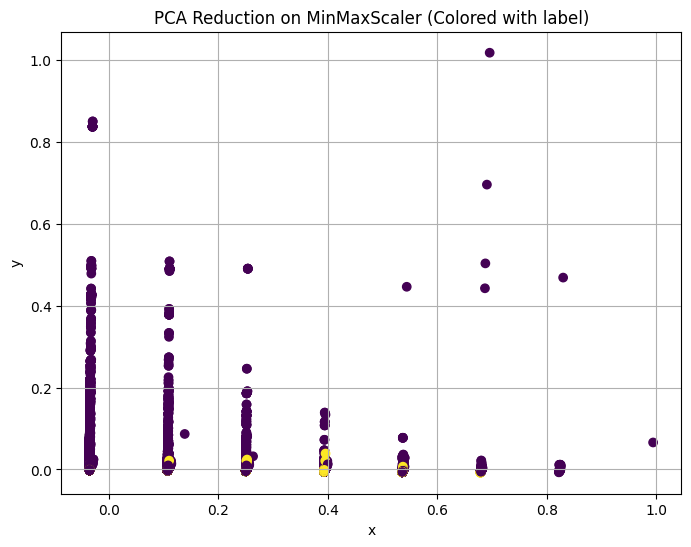

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca['x'], data_pca['y'], c=raw_data['label'])
plt.title('PCA Reduction on MinMaxScaler (Colored with label)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Notes: looks like yellow (phishing emails) only occurs in 4 columns in the middle and that there are a lot of outliers in the top right that mess with the clustering.

99.25% of the data kept below.


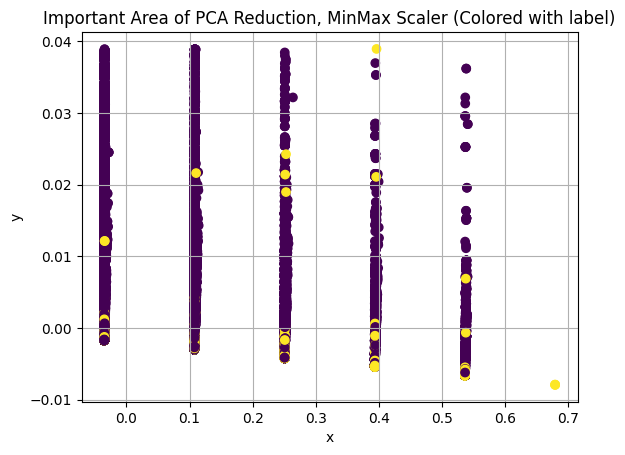

In [5]:
# boolean indexing to get parts of the graph which contain the values we actaully
phishing = data_pca[raw_data['label']==1]
p_min_x = phishing['x'].min()
p_max_x = phishing['x'].max()
p_min_y = phishing['y'].min()
p_max_y = phishing['y'].max()
x_min_search = data_pca['x'] >= p_min_x
x_max_search = data_pca['x'] <= p_max_x
y_min_search = data_pca['y'] >= p_min_y
y_max_search = data_pca['y'] <= p_max_y
search_indexes = x_min_search & x_max_search & y_min_search & y_max_search
data_pca_phish_area = data_pca[search_indexes]
plt.scatter(data_pca_phish_area['x'], data_pca_phish_area['y'], c=raw_data['label'][search_indexes])
plt.title('Important Area of PCA Reduction, MinMax Scaler (Colored with label)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
print(f"{(data_pca_phish_area.shape[0]/raw_data.shape[0]):.2%} of the data kept below.")

So, from above, we can see that there are several outliers in the graph that really throw off the data. As an example, the original PCA graph goes up to y=1.0 while this graph only goes up to y=0.04). And notably, these outliers only occur in 0.75% of the data. So, from here we will retry PCA with those elements removed from the original data.

In [6]:
raw_search_data = raw_data[search_indexes]
raw_search_data.reset_index(drop=True, inplace=True)
no_label_search_data = raw_search_data.drop('label', axis=1)
scaler = MinMaxScaler()
search_data = pd.DataFrame(scaler.fit_transform(no_label_search_data), columns=no_label_search_data.columns)
pca = PCA(n_components=2, random_state=0)
search_pca_vals = pca.fit_transform(search_data)
search_data_pca = pd.DataFrame(data={'x':search_pca_vals[:, 0], 'y':search_pca_vals[:, 1]})

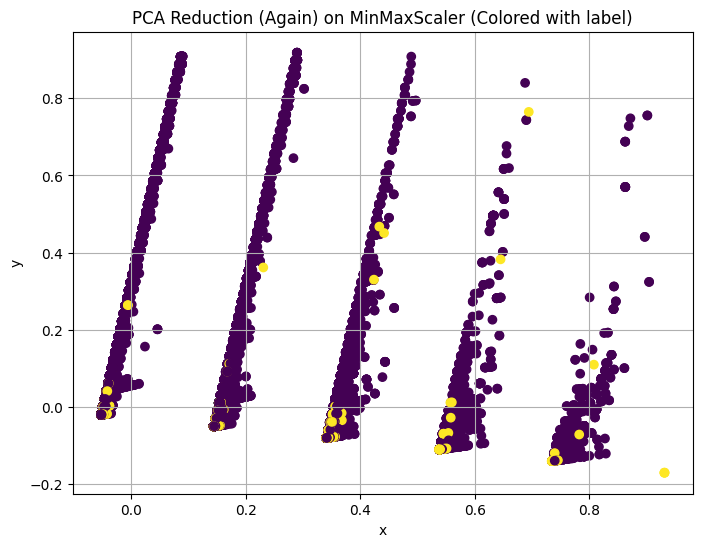

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(search_data_pca['x'], search_data_pca['y'], c=raw_search_data['label'])
plt.title('PCA Reduction (Again) on MinMaxScaler (Colored with label)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Then we'll try plotting only the phishing email values to better see where they are.

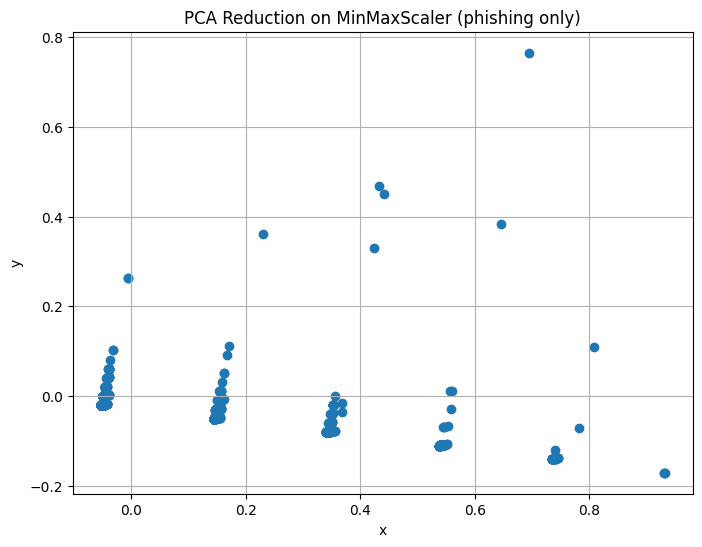

In [8]:
only_phishing = search_data_pca[raw_search_data['label'] == 1]
plt.figure(figsize=(8, 6))
plt.scatter(only_phishing['x'], only_phishing['y'])
plt.title('PCA Reduction on MinMaxScaler (phishing only)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()